<a href="https://colab.research.google.com/github/dulcioris/dulcioris/blob/main/Prac2_SNEDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# a) $y'$ $=y^2 t^2$ ; $y$(0)=1



##**1. Resuelve el problema de valor inicial (PVI) de forma analítica**:





Para la solución exacta tenemos:

$\frac{dy}{dt} = t^2 y^2$

Separando las variables:
$\frac{dy}{y^2} = t^2 dt$

Integramos ambos lados:
$-\frac{1}{y} = \frac{t^3}{3} + C$

Utilizando la condición inicial $y(0) = 1$:
$-\frac{1}{1} = C \quad \Rightarrow \quad C = -1$

Por lo tanto, la solución es:
$-\frac{1}{y} = \frac{t^3}{3} - 1 \quad \Rightarrow \quad y = \frac{1}{1 - \frac{t^3}{3}}$

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Solución exacta de la EDO: y' = t^2 * y^2, y(0) = 1
def exact_solution(t):
    return 1 / (1 - (t**3) / 3)

# Definición de la EDO: y' = t^2 * y^2
def f(t, y):
    return t**2 * y**2

##**2. Aplique los métodos de aproximación al ejercicio anterior.**

In [16]:
# Método de Euler hacia adelante (explícito)
def euler_hacia_adelante(y0, t0, tf, h):
    N = int((tf - t0) / h)
    t_values = np.linspace(t0, tf, N+1)
    y_values = np.zeros(N+1)
    y_values[0] = y0

    for n in range(N):
        y_values[n+1] = y_values[n] + h * f(t_values[n], y_values[n])

    return t_values, y_values

In [8]:
# Método de Euler hacia atrás (implícito)
def euler_hacia_atras(y0, t0, tf, h):
    N = int((tf - t0) / h)
    t_values = np.linspace(t0, tf, N+1)
    y_values = np.zeros(N+1)
    y_values[0] = y0

    for n in range(N):
        implicit_func = lambda y_next: y_next - y_values[n] - h * f(t_values[n+1], y_next)
        y_values[n+1] = fsolve(implicit_func, y_values[n])[0]

    return t_values, y_values

In [9]:
# Método del trapecio (implícito)
def metodo_trapezoidal(y0, t0, tf, h):
    N = int((tf - t0) / h)
    t_values = np.linspace(t0, tf, N+1)
    y_values = np.zeros(N+1)
    y_values[0] = y0

    for n in range(N):
        implicit_func = lambda y_next: y_next - y_values[n] - 0.5 * h * (f(t_values[n], y_values[n]) + f(t_values[n+1], y_next))
        y_values[n+1] = fsolve(implicit_func, y_values[n])[0]

    return t_values, y_values

##**3. Realizar las aproximaciones para h = 0.1, 0.01, 0.001, 0.0001**

In [11]:
# Parámetros
t0 = 0
tf = 2
y0 = 1
h_values = [0.1, 0.01, 0.001, 0.0001]

# Función para interpolar la solución exacta
from scipy.interpolate import interp1d

# Realizando las aproximaciones para distintos valores de h
for h in h_values:
    print(f"\nResultados para h = {h}:\n")

    # Solución exacta
    t_exact = np.linspace(t0, tf, 100)
    y_exact = exact_solution(t_exact)

    # Euler hacia adelante
    t_euler_adelante, y_euler_adelante = euler_hacia_adelante(y0, t0, tf, h)

    # Interpolación de la solución exacta a los puntos t_euler_adelante
    exact_interp_adelante = interp1d(t_exact, y_exact, kind='cubic')
    y_exact_interp_euler_adelante = exact_interp_adelante(t_euler_adelante)

    # Calculo del error de Euler hacia adelante
    error_euler_adelante = np.abs(y_exact_interp_euler_adelante - y_euler_adelante)

    print(f"Euler hacia adelante (h={h}):\n t: {t_euler_adelante}\n y: {y_euler_adelante}\n Error: {error_euler_adelante}\n")

    # Euler hacia atrás
    t_euler_atras, y_euler_atras = euler_hacia_atras(y0, t0, tf, h)

    # Interpolación de la solución exacta a los puntos t_euler_atras
    exact_interp_atras = interp1d(t_exact, y_exact, kind='cubic')
    y_exact_interp_euler_atras = exact_interp_atras(t_euler_atras)

    # Calculo del error de Euler hacia atrás
    error_euler_atras = np.abs(y_exact_interp_euler_atras - y_euler_atras)

    print(f"Euler hacia atrás (h={h}):\n t: {t_euler_atras}\n y: {y_euler_atras}\n Error: {error_euler_atras}\n")

    # Método del trapecio
    t_trapezoidal, y_trapezoidal = metodo_trapezoidal(y0, t0, tf, h)

    # Interpolación de la solución exacta a los puntos t_trapezoidal
    exact_interp_trapezoidal = interp1d(t_exact, y_exact, kind='cubic')
    y_exact_interp_trapezoidal = exact_interp_trapezoidal(t_trapezoidal)

    # Calculo del error del método del trapecio
    error_trapezoidal = np.abs(y_exact_interp_trapezoidal - y_trapezoidal)

    print(f"Método del trapecio (h={h}):\n t: {t_trapezoidal}\n y: {y_trapezoidal}\n Error: {error_trapezoidal}\n")


Resultados para h = 0.1:

Euler hacia adelante (h=0.1):
 t: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2. ]
 y: [1.00000000e+00 1.00000000e+00 1.00100000e+00 1.00500800e+00
 1.01409837e+00 1.03055270e+00 1.05710367e+00 1.09733253e+00
 1.15633532e+00 1.24191045e+00 1.36684012e+00 1.55366531e+00
 1.84574429e+00 2.33631946e+00 3.25878714e+00 5.34024708e+00
 1.17568508e+01 4.71420775e+01 6.89408590e+02 1.54681490e+05
 8.63757190e+09]
 Error: [0.00000000e+00 3.33444483e-04 1.67379673e-03 4.07373125e-03
 7.69999010e-03 1.29255557e-02 2.04825256e-02 3.17604166e-02
 4.94524176e-02 7.90934098e-02 1.33159590e-01 2.43817182e-01
 5.12730816e-01 1.40586934e+00 4.54349585e+00 1.45151037e+01
 1.44926212e+01 4.87102960e+01 6.90467912e+02 1.54682268e+05
 8.63757190e+09]

Euler hacia atrás (h=0.1):
 t: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2. ]
 y: [1.         1.00100201 1.00504245 1.01430172 1.03131964 1.05937661
 1.103

<ipython-input-8-5b765773b95e>:10: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  y_values[n+1] = fsolve(implicit_func, y_values[n])[0]
<ipython-input-6-06f06c9b53c8>:11: RuntimeWarning: overflow encountered in scalar power
  return t**2 * y**2


Euler hacia atrás (h=0.001):
 t: [0.000e+00 1.000e-03 2.000e-03 ... 1.998e+00 1.999e+00 2.000e+00]
 y: [  1.           1.           1.00000001 ... 125.24222271 125.12480593
 125.00749908]
 Error: [0.00000000e+00 6.44508225e-10 2.29286456e-09 ... 1.25845114e+02
 1.25726249e+02 1.25607499e+02]

Método del trapecio (h=0.001):
 t: [0.000e+00 1.000e-03 2.000e-03 ... 1.998e+00 1.999e+00 2.000e+00]
 y: [  1.           1.           1.         ... 250.44260835 250.2861576
 249.97344914]
 Error: [0.00000000e+00 1.44508183e-10 2.92864399e-10 ... 2.51045500e+02
 2.50887601e+02 2.50573449e+02]


Resultados para h = 0.0001:

Euler hacia adelante (h=0.0001):
 t: [0.0000e+00 1.0000e-04 2.0000e-04 ... 1.9998e+00 1.9999e+00 2.0000e+00]
 y: [ 1.  1.  1. ... inf inf inf]
 Error: [0.00000000e+00 2.72959433e-12 6.41864339e-12 ...            inf
            inf            inf]

Euler hacia atrás (h=0.0001):
 t: [0.0000e+00 1.0000e-04 2.0000e-04 ... 1.9998e+00 1.9999e+00 2.0000e+00]
 y: [1.00000000e+00 1.0000

##**4. Realiza las gráficas**

###a) ETL

<ipython-input-8-5b765773b95e>:10: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  y_values[n+1] = fsolve(implicit_func, y_values[n])[0]


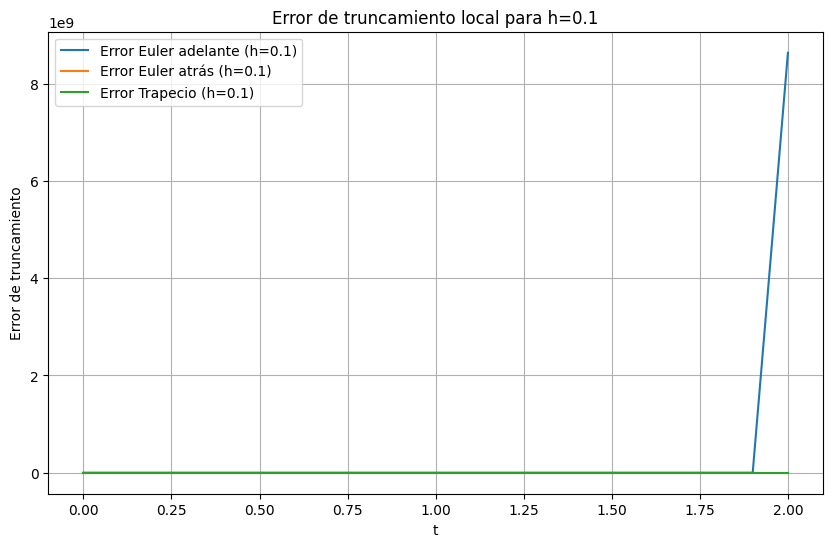

<ipython-input-6-06f06c9b53c8>:11: RuntimeWarning: overflow encountered in scalar power
  return t**2 * y**2


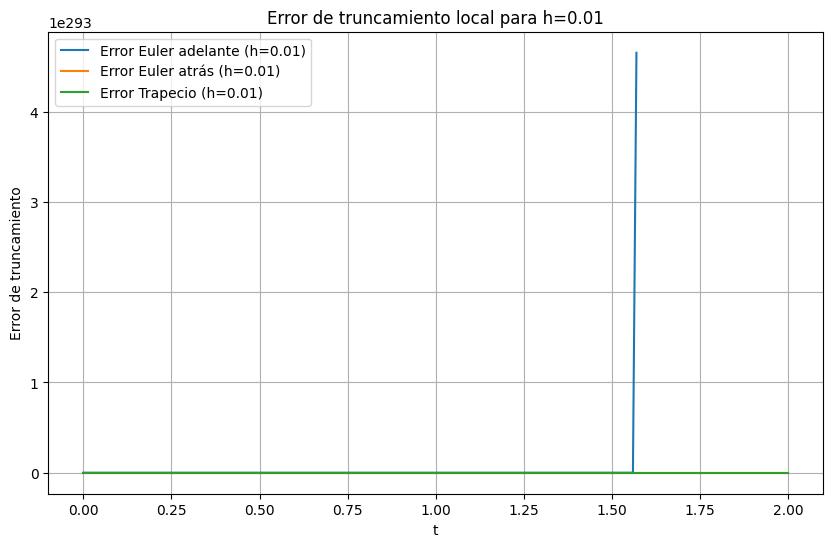

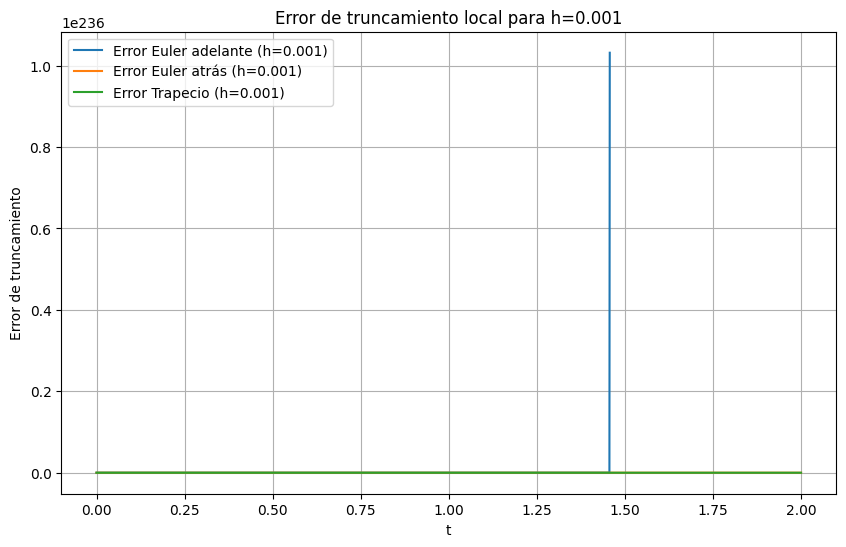

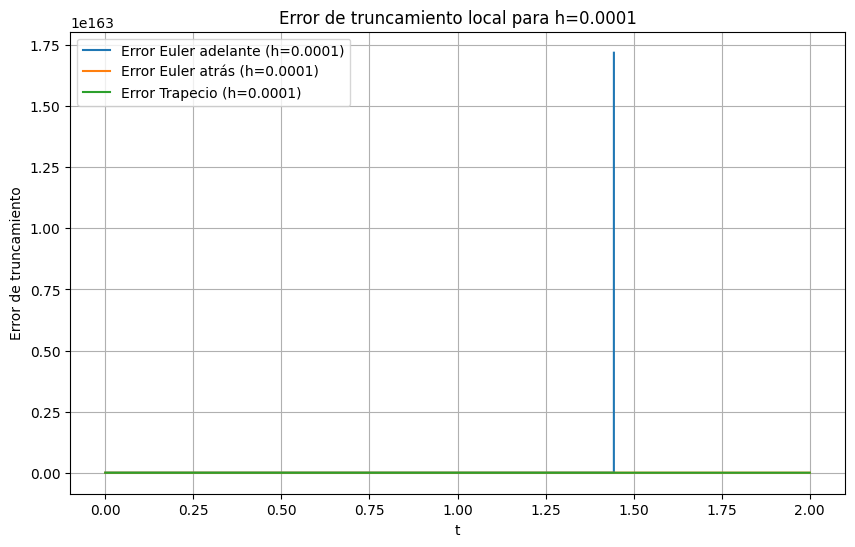

In [12]:
from scipy.interpolate import interp1d

# Gráfica del error de truncamiento local para distintos valores de h
for h in h_values:
    # Solución exacta
    t_exact = np.linspace(t0, tf, 100)
    y_exact = exact_solution(t_exact)

    # Euler hacia adelante
    t_euler_adelante, y_euler_adelante = euler_hacia_adelante(y0, t0, tf, h)
    interp_exact_euler_adelante = interp1d(t_exact, y_exact, kind='cubic')
    y_exact_interp_euler_adelante = interp_exact_euler_adelante(t_euler_adelante)
    error_truncamiento_euler_adelante = np.abs(y_exact_interp_euler_adelante - y_euler_adelante)

    # Euler hacia atrás
    t_euler_atras, y_euler_atras = euler_hacia_atras(y0, t0, tf, h)
    interp_exact_euler_atras = interp1d(t_exact, y_exact, kind='cubic')
    y_exact_interp_euler_atras = interp_exact_euler_atras(t_euler_atras)
    error_truncamiento_euler_atras = np.abs(y_exact_interp_euler_atras - y_euler_atras)

    # Método del trapecio
    t_trapezoidal, y_trapezoidal = metodo_trapezoidal(y0, t0, tf, h)
    interp_exact_trapezoidal = interp1d(t_exact, y_exact, kind='cubic')
    y_exact_interp_trapezoidal = interp_exact_trapezoidal(t_trapezoidal)
    error_truncamiento_trapezoidal = np.abs(y_exact_interp_trapezoidal - y_trapezoidal)

    # Graficar errores de truncamiento local
    plt.figure(figsize=(10, 6))
    plt.plot(t_euler_adelante, error_truncamiento_euler_adelante, label=f'Error Euler adelante (h={h})')
    plt.plot(t_euler_atras, error_truncamiento_euler_atras, label=f'Error Euler atrás (h={h})')
    plt.plot(t_trapezoidal, error_truncamiento_trapezoidal, label=f'Error Trapecio (h={h})')
    plt.title(f'Error de truncamiento local para h={h}')
    plt.xlabel('t')
    plt.ylabel('Error de truncamiento')
    plt.legend()
    plt.grid(True)
    plt.show()

###b) Comparación

<ipython-input-8-5b765773b95e>:10: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  y_values[n+1] = fsolve(implicit_func, y_values[n])[0]


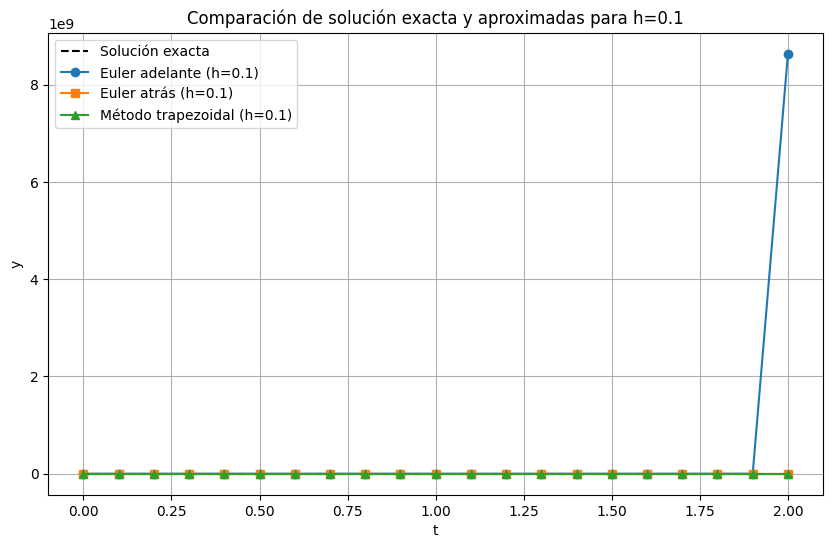

<ipython-input-6-06f06c9b53c8>:11: RuntimeWarning: overflow encountered in scalar power
  return t**2 * y**2


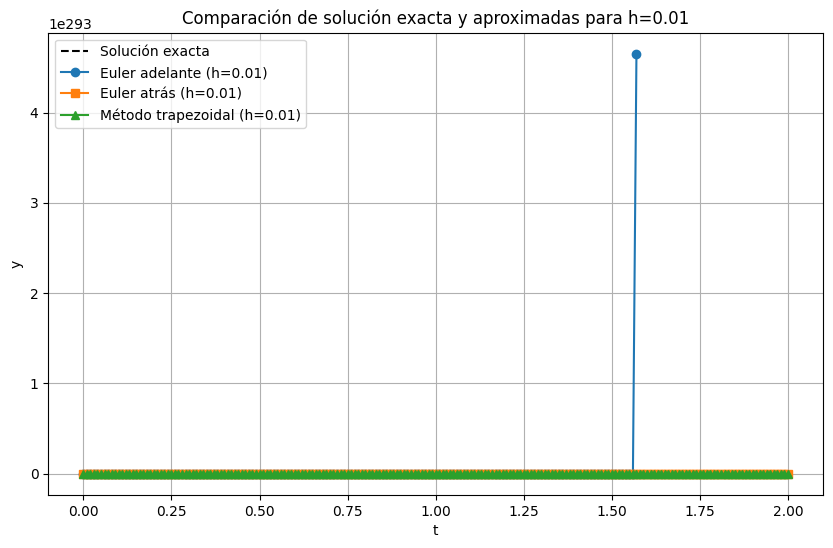

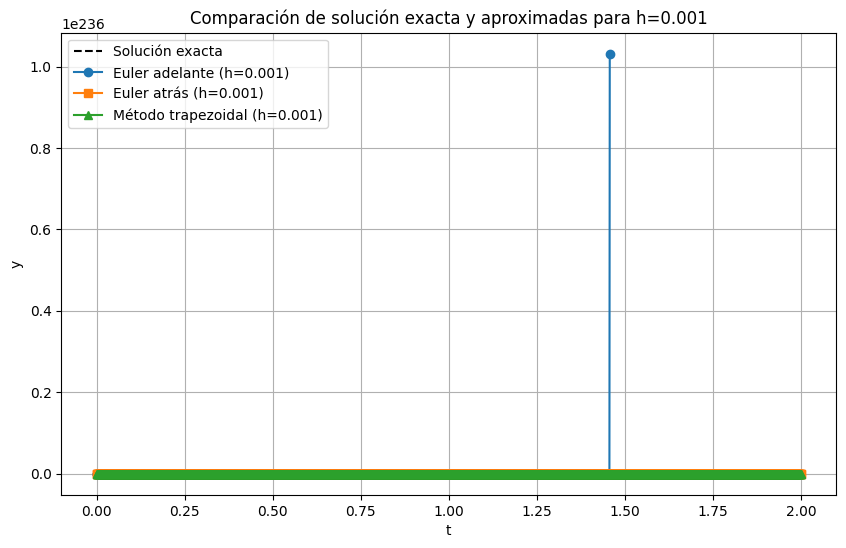

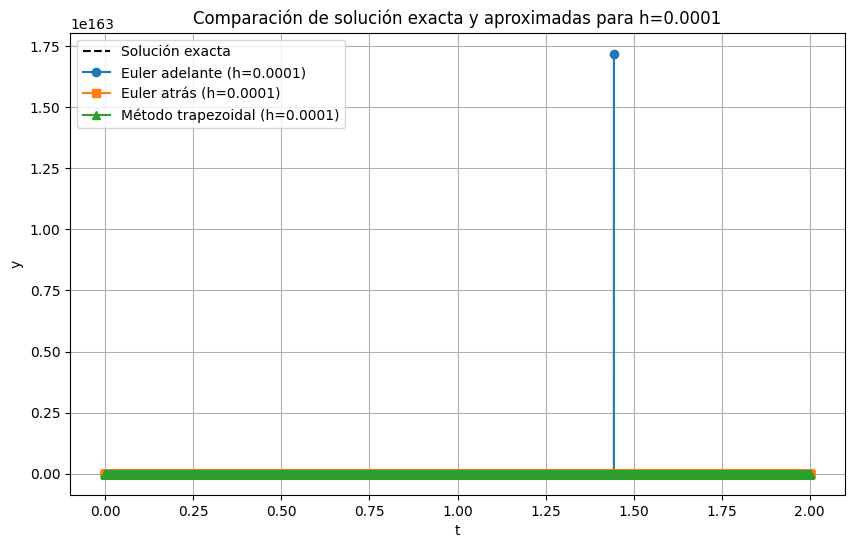

In [13]:
# Gráfica de comparación entre la solución exacta y las aproximadas
for h in h_values:
    t_exact = np.linspace(t0, tf, 100)
    y_exact = exact_solution(t_exact)

    # Euler hacia adelante
    t_euler_adelante, y_euler_adelante = euler_hacia_adelante(y0, t0, tf, h)

    # Euler hacia atrás
    t_euler_atras, y_euler_atras = euler_hacia_atras(y0, t0, tf, h)

    # Método del trapecio
    t_trapezoidal, y_trapezoidal = metodo_trapezoidal(y0, t0, tf, h)

    # Gráfica de comparación
    plt.figure(figsize=(10, 6))
    plt.plot(t_exact, y_exact, label='Solución exacta', color='black', linestyle='dashed')
    plt.plot(t_euler_adelante, y_euler_adelante, label=f'Euler adelante (h={h})', marker='o')
    plt.plot(t_euler_atras, y_euler_atras, label=f'Euler atrás (h={h})', marker='s')
    plt.plot(t_trapezoidal, y_trapezoidal, label=f'Método trapezoidal (h={h})', marker='^')
    plt.title(f'Comparación de solución exacta y aproximadas para h={h}')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

###c) Gráfica de error Global

<ipython-input-15-234246cf65a2>:31: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  y_values[n+1] = fsolve(implicit_func, y_values[n])[0]


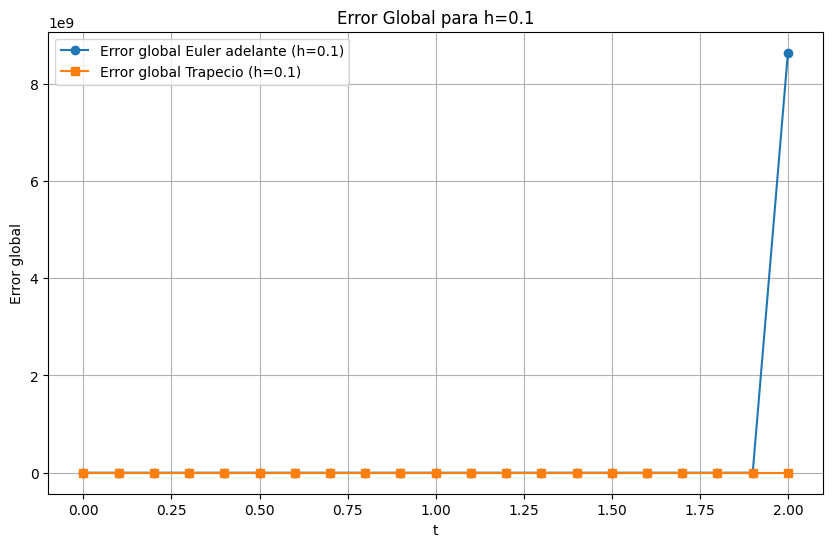

<ipython-input-15-234246cf65a2>:8: RuntimeWarning: overflow encountered in scalar power
  return y**2 * t**2


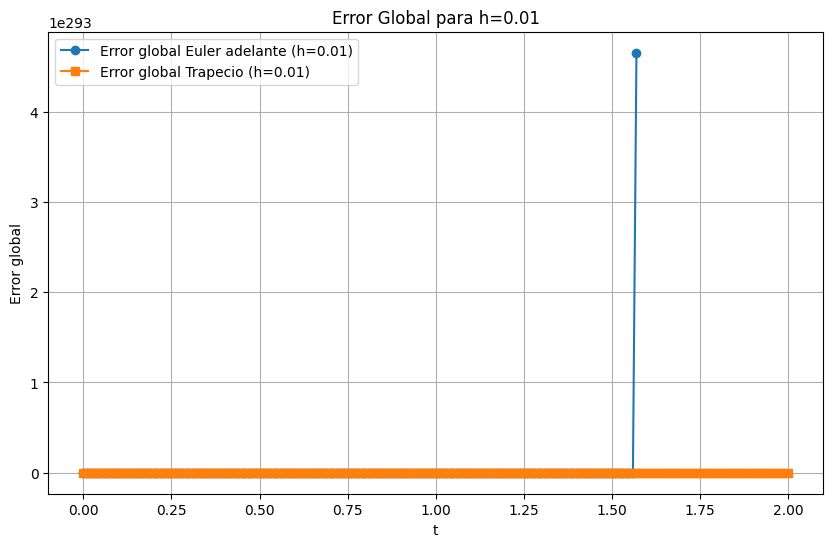

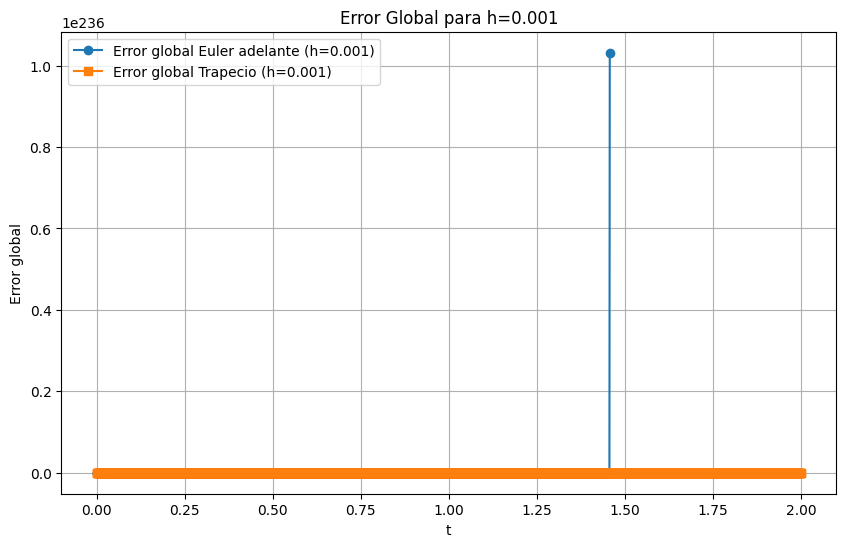

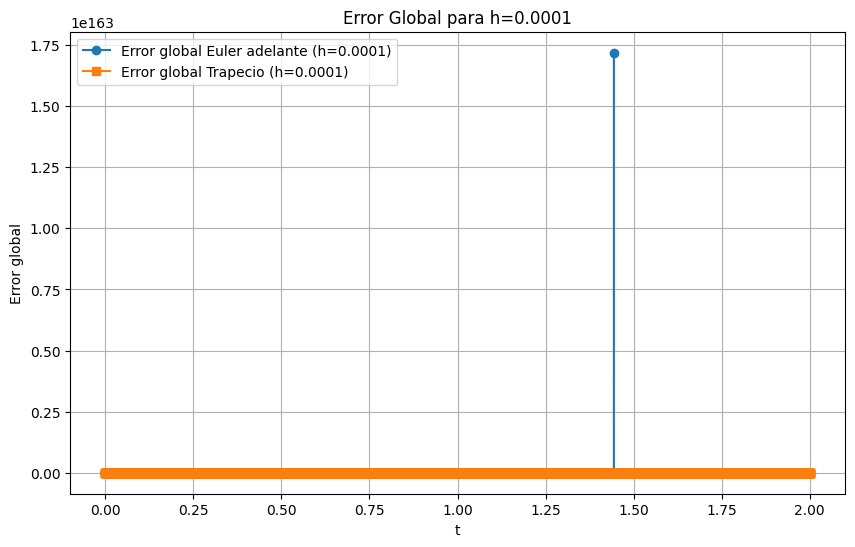

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Definimos la función f(t, y) de la nueva EDO: y' = y^2 * t^2
def f(t, y):
    return y**2 * t**2

# Método de Euler hacia adelante
def euler_hacia_adelante(y0, t0, tf, h):
    N = int((tf - t0) / h)
    t_values = np.linspace(t0, tf, N+1)
    y_values = np.zeros(N+1)
    y_values[0] = y0

    for n in range(N):
        y_values[n+1] = y_values[n] + h * f(t_values[n], y_values[n])

    return t_values, y_values

# Método del trapecio (implícito)
def metodo_trapezoidal(y0, t0, tf, h):
    N = int((tf - t0) / h)
    t_values = np.linspace(t0, tf, N+1)
    y_values = np.zeros(N+1)
    y_values[0] = y0

    for n in range(N):
        implicit_func = lambda y_next: y_next - y_values[n] - 0.5 * h * (f(t_values[n], y_values[n]) + f(t_values[n+1], y_next))
        y_values[n+1] = fsolve(implicit_func, y_values[n])[0]

    return t_values, y_values

# Parámetros
t0 = 0
tf = 2
y0 = 1
h_values = [0.1, 0.01, 0.001, 0.0001]

# Supongamos que exact_solution es una función definida si tenemos la solución exacta
def exact_solution(t):
    # Esta es una función placeholder; reemplázala con la solución exacta si se conoce.
    return np.exp(t)  # Ejemplo de solución, ajustar según el problema real.

# Gráfica del error global para distintos valores de h
for h in h_values:
    # Solución exacta
    t_exact = np.linspace(t0, tf, 100)
    y_exact = exact_solution(t_exact)

    # Euler hacia adelante
    t_euler_adelante, y_euler_adelante = euler_hacia_adelante(y0, t0, tf, h)
    interp_exact_euler_adelante = interp1d(t_exact, y_exact, kind='cubic', fill_value="extrapolate")
    y_exact_interp_euler_adelante = interp_exact_euler_adelante(t_euler_adelante)
    error_global_euler_adelante = np.abs(y_exact_interp_euler_adelante - y_euler_adelante)

    # Método del trapecio
    t_trapezoidal, y_trapezoidal = metodo_trapezoidal(y0, t0, tf, h)
    interp_exact_trapezoidal = interp1d(t_exact, y_exact, kind='cubic', fill_value="extrapolate")
    y_exact_interp_trapezoidal = interp_exact_trapezoidal(t_trapezoidal)
    error_global_trapezoidal = np.abs(y_exact_interp_trapezoidal - y_trapezoidal)

    # Graficar errores globales
    plt.figure(figsize=(10, 6))
    plt.plot(t_euler_adelante, error_global_euler_adelante, label=f'Error global Euler adelante (h={h})', marker='o')
    plt.plot(t_trapezoidal, error_global_trapezoidal, label=f'Error global Trapecio (h={h})', marker='s')
    plt.title(f'Error Global para h={h}')
    plt.xlabel('t')
    plt.ylabel('Error global')
    plt.legend()
    plt.grid(True)
    plt.show()

#b) $y'$ $=$ $5t$$+y$; $y$(0)=1

##**1. Resuelve de manera analítica**

Reescribiendo tenemos:
$y' - y = 5t$

El factor integrante se obtiene de la parte de $y$ en la ecuación diferencial. En este caso, es $e^{\int -1 \, dt} = e^{-t}$

Multiplicamos la ecuación por $e^{-t}$:

$e^{-t} y' - e^{-t} y = 5t e^{-t}$

Esto se puede reescribir como:

$\frac{d}{dt} \left( e^{-t} y \right) = 5t e^{-t}$

Ahora integramos ambos lados con respecto a $t$:

$e^{-t} y = \int 5t e^{-t} \, dt$

Para integrar el lado derecho, usamos integración por partes:

- $u = 5t$ y $dv = e^{-t} dt$
- Entonces $du = 5 dt$ y $v = -e^{-t}$

La integral es:

$\int 5t e^{-t} dt = -5t e^{-t} + 5 e^{-t} + C$

Sustituyendo en la ecuación, obtenemos:

$e^{-t} y = -5t e^{-t} + 5 e^{-t} + C$

Multiplicamos ambos lados por $e^t$ para despejar $y$

$y = -5t + 5 + C e^t$

Usamos la condición la condición inicial:

$1 = -5(0) + 5 + C e^0$

$1 = 5 + C$

De aquí, $C = -4$

Sustituimos el valor de $C$ en la solución general:

$y(t) = -5t + 5 - 4e^t$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Solución exacta de la EDO: y' = 5t + y, y(0) = 1
def exact_solution(t):
    return (6 * np.exp(t)) - (5 * t) - 5

# Definición de la EDO: y' = 5t + y
def f(t, y):
    return 5*t + y

##**2. Métodos de aproximación**

In [ ]:
# Método de Euler hacia adelante (explícito)
def euler_hacia_adelante(y0, t0, tf, h):
    N = int((tf - t0) / h)
    t_values = np.linspace(t0, tf, N+1)
    y_values = np.zeros(N+1)
    y_values[0] = y0

    for n in range(N):
        y_values[n+1] = y_values[n] + h * f(t_values[n], y_values[n])

    return t_values, y_values

# Método de Euler hacia atrás (implícito)
def euler_hacia_atras(y0, t0, tf, h):
    N = int((tf - t0) / h)
    t_values = np.linspace(t0, tf, N+1)
    y_values = np.zeros(N+1)
    y_values[0] = y0

    for n in range(N):
        implicit_func = lambda y_next: y_next - y_values[n] - h * f(t_values[n+1], y_next)
        y_values[n+1] = fsolve(implicit_func, y_values[n])[0]

    return t_values, y_values

# Método del trapecio (implícito)
def metodo_trapezoidal(y0, t0, tf, h):
    N = int((tf - t0) / h)
    t_values = np.linspace(t0, tf, N+1)
    y_values = np.zeros(N+1)
    y_values[0] = y0

    for n in range(N):
        implicit_func = lambda y_next: y_next - y_values[n] - 0.5 * h * (f(t_values[n], y_values[n]) + f(t_values[n+1], y_next))
        y_values[n+1] = fsolve(implicit_func, y_values[n])[0]

    return t_values, y_values

##**3. Realizar aproximaciones**

In [ ]:
# Parámetros
t0 = 0
tf = 2
y0 = 1
h_values = [0.1, 0.01, 0.001, 0.0001]

# Realizando las aproximaciones para distintos valores de h
for h in h_values:
    print(f"\nResultados para h = {h}:\n")

    # Solución exacta
    t_exact = np.linspace(t0, tf, 100)
    y_exact = exact_solution(t_exact)

    # Euler hacia adelante
    t_euler_adelante, y_euler_adelante = euler_hacia_adelante(y0, t0, tf, h)
    print(f"Euler hacia adelante (h={h}):\n t: {t_euler_adelante}\n y: {y_euler_adelante}\n")

    # Euler hacia atrás
    t_euler_atras, y_euler_atras = euler_hacia_atras(y0, t0, tf, h)
    print(f"Euler hacia atrás (h={h}):\n t: {t_euler_atras}\n y: {y_euler_atras}\n")

    # Método del trapecio
    t_trapezoidal, y_trapezoidal = metodo_trapezoidal(y0, t0, tf, h)
    print(f"Método del trapecio (h={h}):\n t: {t_trapezoidal}\n y: {y_trapezoidal}\n")


Resultados para h = 0.1:

Euler hacia adelante (h=0.1):
 t: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2. ]
 y: [ 1.          1.1         1.26        1.486       1.7846      2.16306
  2.629366    3.1923026   3.86153286  4.64768615  5.56245476  6.61870024
  7.83057026  9.21362729 10.78499001 12.56348902 14.56983792 16.82682171
 19.35950388 22.19545427 25.3649997 ]

Euler hacia atrás (h=0.1):
 t: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2. ]
 y: [ 1.          1.16666667  1.40740741  1.73045267  2.14494742  2.66105269
  3.29005854  4.04450949  4.93834388  5.98704875  7.20783194  8.61981327
 10.24423697 12.10470774 14.22745305 16.6416145  19.37957166 22.47730185
 25.97477983 29.91642204 34.35158004]

Método del trapecio (h=0.1):
 t: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2. ]
 y: [ 1.          1.13157895  1.32963989  1.60118093  1.95393682  2.39645648
  2.93818874  3.

<ipython-input-21-ec5b8ed766c0>:22: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  y_values[n+1] = fsolve(implicit_func, y_values[n])[0]


Euler hacia atrás (h=0.0001):
 t: [0.0000e+00 1.0000e-04 2.0000e-04 ... 1.9998e+00 1.9999e+00 2.0000e+00]
 y: [ 1.          1.00010006  1.00020018 ... 29.33090323 29.33483667
 29.33877054]



<ipython-input-21-ec5b8ed766c0>:35: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  y_values[n+1] = fsolve(implicit_func, y_values[n])[0]


Método del trapecio (h=0.0001):
 t: [0.0000e+00 1.0000e-04 2.0000e-04 ... 1.9998e+00 1.9999e+00 2.0000e+00]
 y: [ 1.          1.00010003  1.00020012 ... 29.32647069 29.33040346
 29.33433667]



##**4. Realiza las gráficas**

###a) ETL

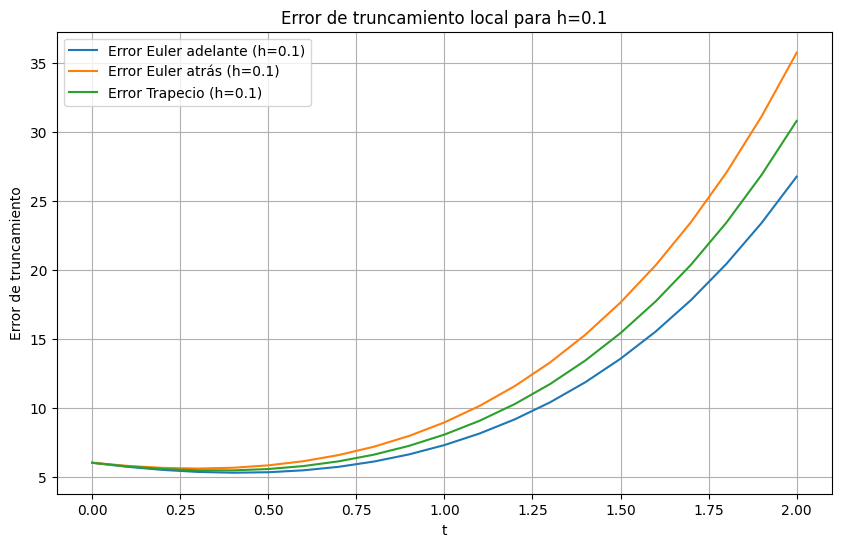

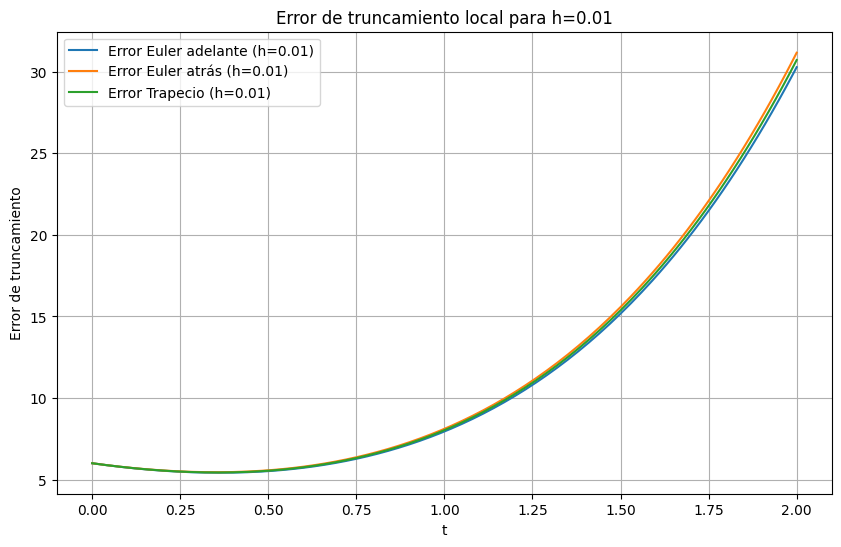

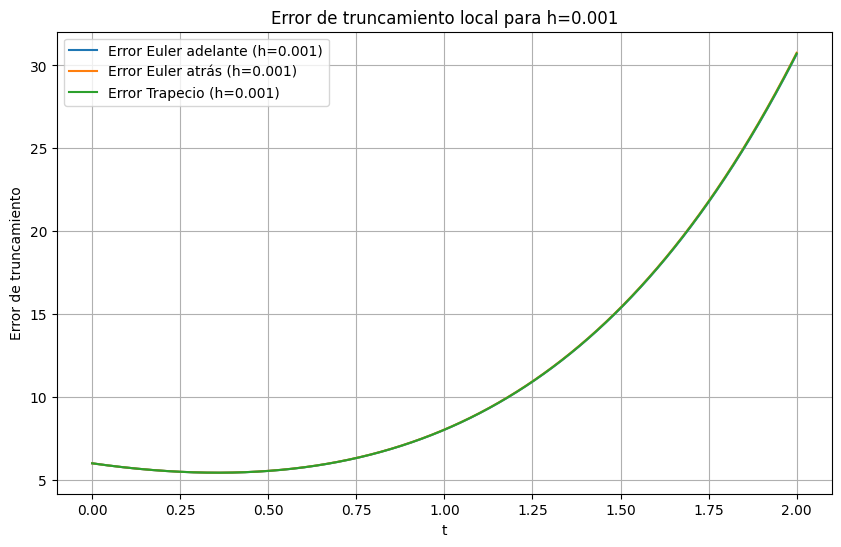

<ipython-input-21-ec5b8ed766c0>:22: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  y_values[n+1] = fsolve(implicit_func, y_values[n])[0]
<ipython-input-21-ec5b8ed766c0>:35: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  y_values[n+1] = fsolve(implicit_func, y_values[n])[0]


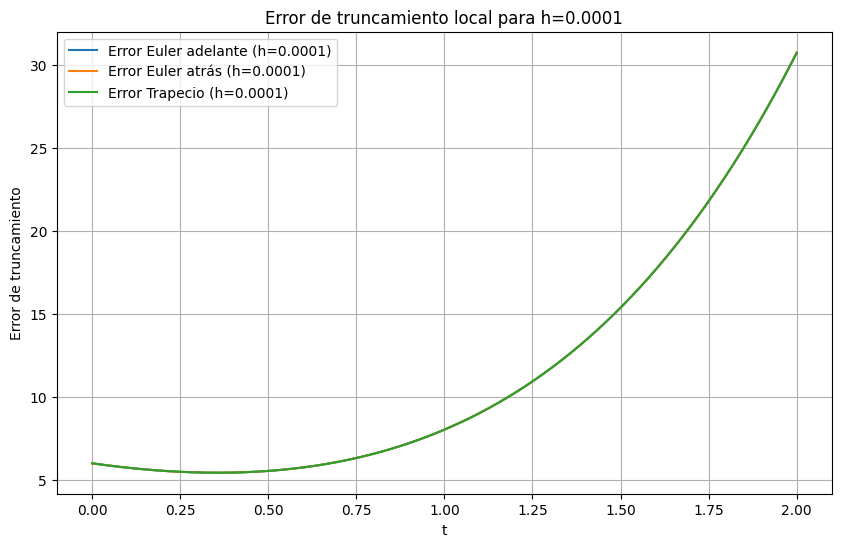

In [ ]:
from scipy.interpolate import interp1d

# Gráfica del error de truncamiento local para distintos valores de h
for h in h_values:
    # Solución exacta
    t_exact = np.linspace(t0, tf, 100)
    y_exact = exact_solution(t_exact)

    # Euler hacia adelante
    t_euler_adelante, y_euler_adelante = euler_hacia_adelante(y0, t0, tf, h)
    interp_exact_euler_adelante = interp1d(t_exact, y_exact, kind='cubic')
    y_exact_interp_euler_adelante = interp_exact_euler_adelante(t_euler_adelante)
    error_truncamiento_euler_adelante = np.abs(y_exact_interp_euler_adelante - y_euler_adelante)

    # Euler hacia atrás
    t_euler_atras, y_euler_atras = euler_hacia_atras(y0, t0, tf, h)
    interp_exact_euler_atras = interp1d(t_exact, y_exact, kind='cubic')
    y_exact_interp_euler_atras = interp_exact_euler_atras(t_euler_atras)
    error_truncamiento_euler_atras = np.abs(y_exact_interp_euler_atras - y_euler_atras)

    # Método del trapecio
    t_trapezoidal, y_trapezoidal = metodo_trapezoidal(y0, t0, tf, h)
    interp_exact_trapezoidal = interp1d(t_exact, y_exact, kind='cubic')
    y_exact_interp_trapezoidal = interp_exact_trapezoidal(t_trapezoidal)
    error_truncamiento_trapezoidal = np.abs(y_exact_interp_trapezoidal - y_trapezoidal)

    # Graficar errores de truncamiento local
    plt.figure(figsize=(10, 6))
    plt.plot(t_euler_adelante, error_truncamiento_euler_adelante, label=f'Error Euler adelante (h={h})')
    plt.plot(t_euler_atras, error_truncamiento_euler_atras, label=f'Error Euler atrás (h={h})')
    plt.plot(t_trapezoidal, error_truncamiento_trapezoidal, label=f'Error Trapecio (h={h})')
    plt.title(f'Error de truncamiento local para h={h}')
    plt.xlabel('t')
    plt.ylabel('Error de truncamiento')
    plt.legend()
    plt.grid(True)
    plt.show()

###b) Comparación

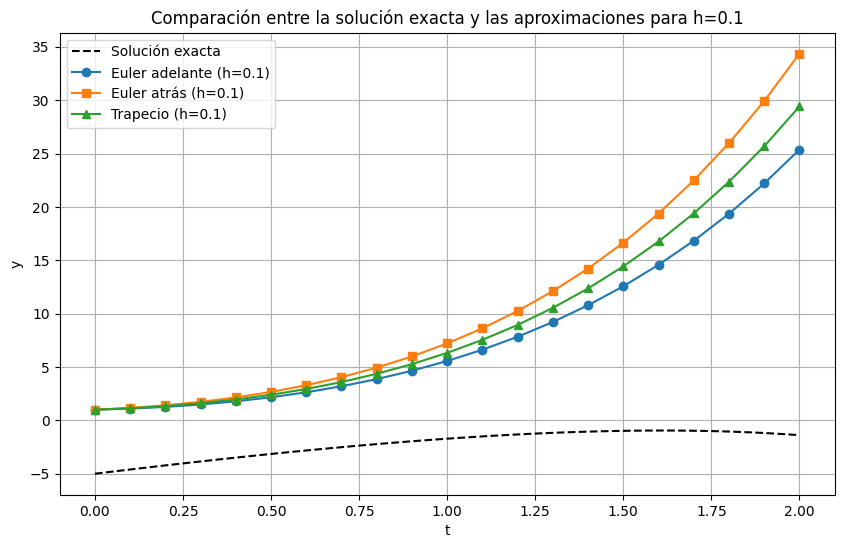

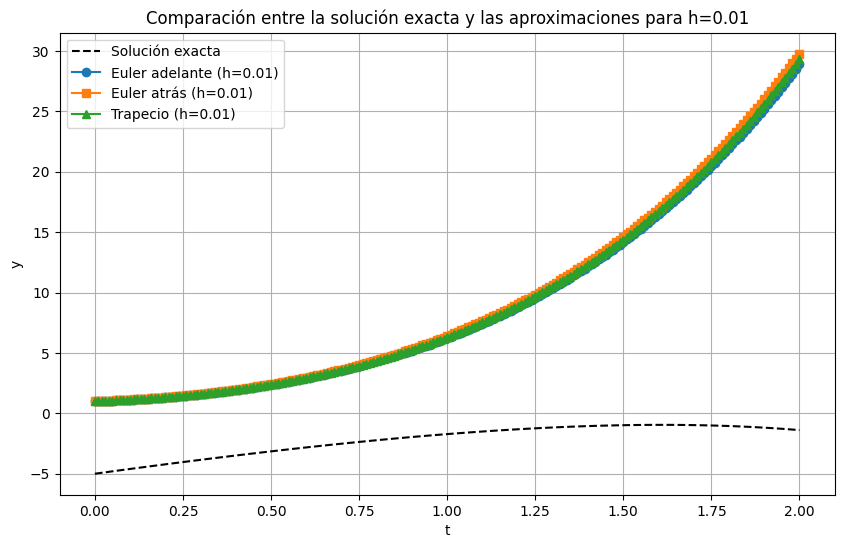

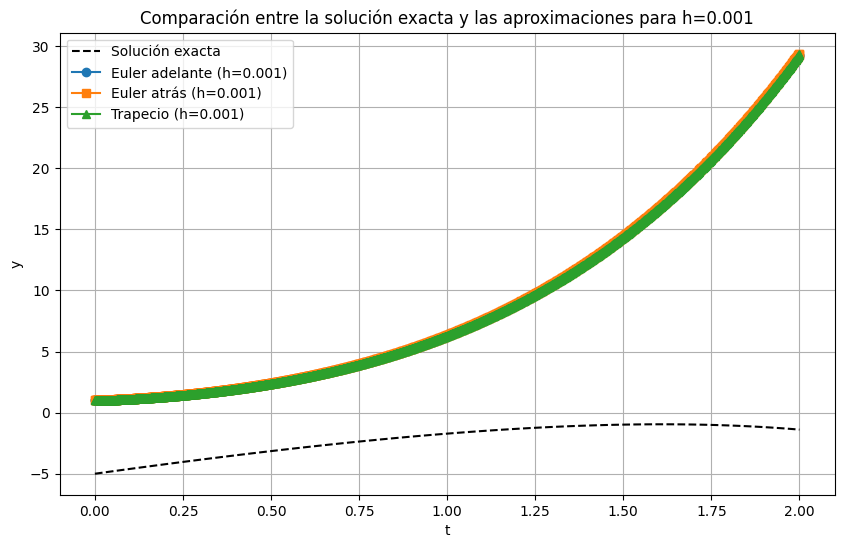

<ipython-input-21-ec5b8ed766c0>:22: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  y_values[n+1] = fsolve(implicit_func, y_values[n])[0]
<ipython-input-21-ec5b8ed766c0>:35: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  y_values[n+1] = fsolve(implicit_func, y_values[n])[0]


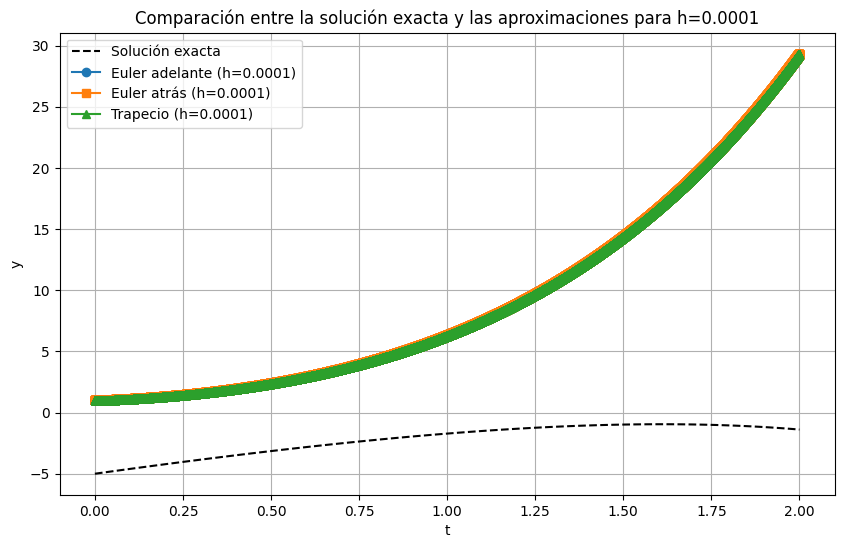

In [ ]:
# Gráfica de comparación entre la solución exacta y las aproximadas
for h in h_values:
    t_exact = np.linspace(t0, tf, 100)
    y_exact = exact_solution(t_exact)

    # Euler hacia adelante
    t_euler_adelante, y_euler_adelante = euler_hacia_adelante(y0, t0, tf, h)

    # Euler hacia atrás
    t_euler_atras, y_euler_atras = euler_hacia_atras(y0, t0, tf, h)

    # Método del trapecio
    t_trapezoidal, y_trapezoidal = metodo_trapezoidal(y0, t0, tf, h)

    # Gráfica de comparación
    plt.figure(figsize=(10, 6))
    plt.plot(t_exact, y_exact, label='Solución exacta', color='black', linestyle='dashed')
    plt.plot(t_euler_adelante, y_euler_adelante, label=f'Euler adelante (h={h})', marker='o')
    #plt.plot(t_euler_atras, y_euler_atras, label=f'Euler atrás (h={h})',
    plt.plot(t_euler_atras, y_euler_atras, label=f'Euler atrás (h={h})', marker='s')
    plt.plot(t_trapezoidal, y_trapezoidal, label=f'Trapecio (h={h})', marker='^')
    plt.title(f'Comparación entre la solución exacta y las aproximaciones para h={h}')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

###c) Error global

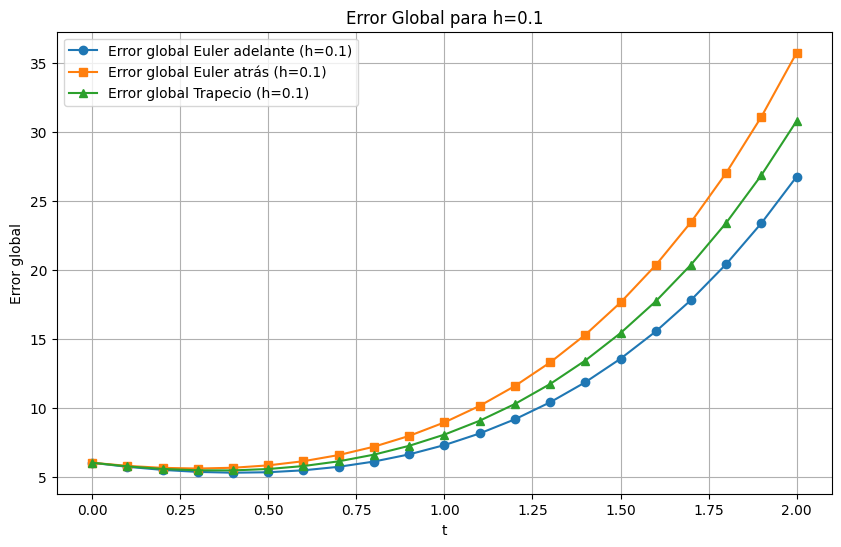

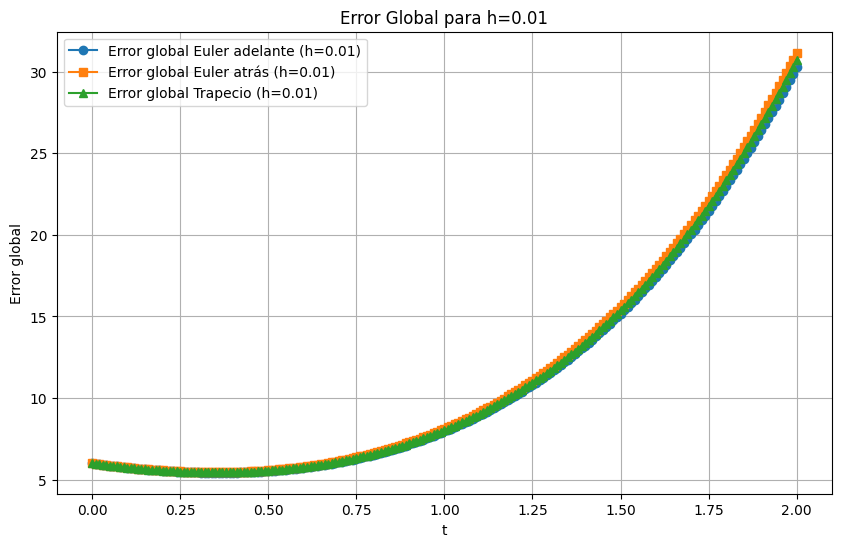

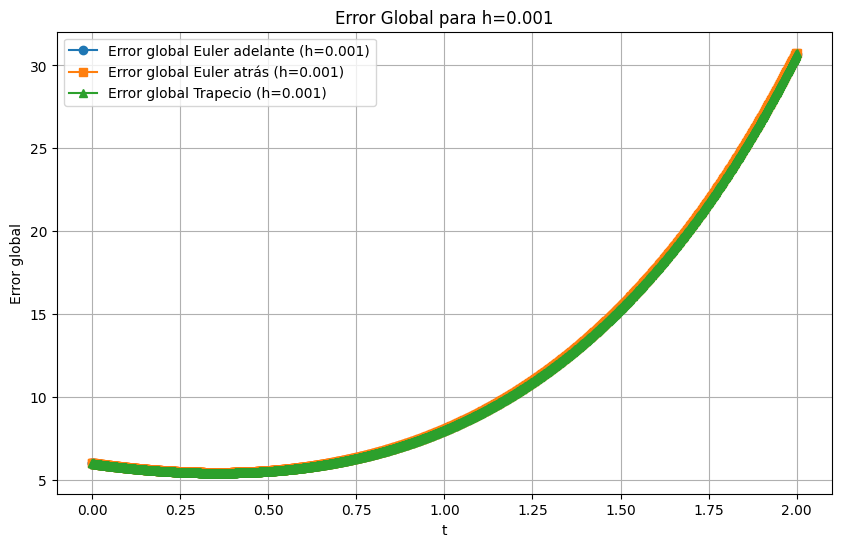

<ipython-input-21-ec5b8ed766c0>:22: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  y_values[n+1] = fsolve(implicit_func, y_values[n])[0]
<ipython-input-21-ec5b8ed766c0>:35: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  y_values[n+1] = fsolve(implicit_func, y_values[n])[0]


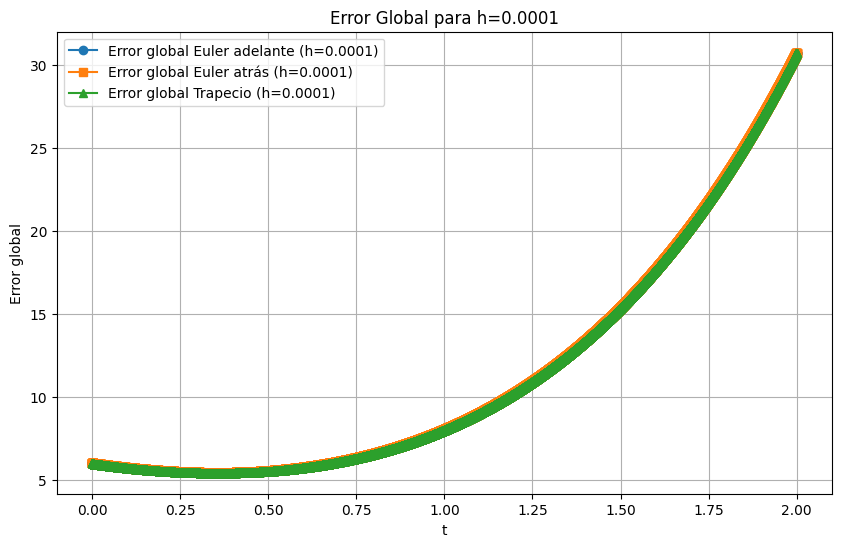

In [ ]:
from scipy.interpolate import interp1d

# Gráfica de error global para distintos valores de h
for h in h_values:
    # Solución exacta
    t_exact = np.linspace(t0, tf, 100)
    y_exact = exact_solution(t_exact)

    # Euler hacia adelante
    t_euler_adelante, y_euler_adelante = euler_hacia_adelante(y0, t0, tf, h)
    interp_exact_euler_adelante = interp1d(t_exact, y_exact, kind='cubic')  # Interpolamos la solución exacta
    y_exact_interp_euler_adelante = interp_exact_euler_adelante(t_euler_adelante)
    error_global_euler_adelante = np.abs(y_exact_interp_euler_adelante - y_euler_adelante)

    # Euler hacia atrás
    t_euler_atras, y_euler_atras = euler_hacia_atras(y0, t0, tf, h)
    interp_exact_euler_atras = interp1d(t_exact, y_exact, kind='cubic')
    y_exact_interp_euler_atras = interp_exact_euler_atras(t_euler_atras)
    error_global_euler_atras = np.abs(y_exact_interp_euler_atras - y_euler_atras)

    # Método del trapecio
    t_trapezoidal, y_trapezoidal = metodo_trapezoidal(y0, t0, tf, h)
    interp_exact_trapezoidal = interp1d(t_exact, y_exact, kind='cubic')
    y_exact_interp_trapezoidal = interp_exact_trapezoidal(t_trapezoidal)
    error_global_trapezoidal = np.abs(y_exact_interp_trapezoidal - y_trapezoidal)

    # Graficar errores globales
    plt.figure(figsize=(10, 6))
    plt.plot(t_euler_adelante, error_global_euler_adelante, label=f'Error global Euler adelante (h={h})', marker='o')
    plt.plot(t_euler_atras, error_global_euler_atras, label=f'Error global Euler atrás (h={h})', marker='s')
    plt.plot(t_trapezoidal, error_global_trapezoidal, label=f'Error global Trapecio (h={h})', marker='^')
    plt.title(f'Error Global para h={h}')
    plt.xlabel('t')
    plt.ylabel('Error global')
    plt.legend()
    plt.grid(True)
    plt.show()

##5. Comparación

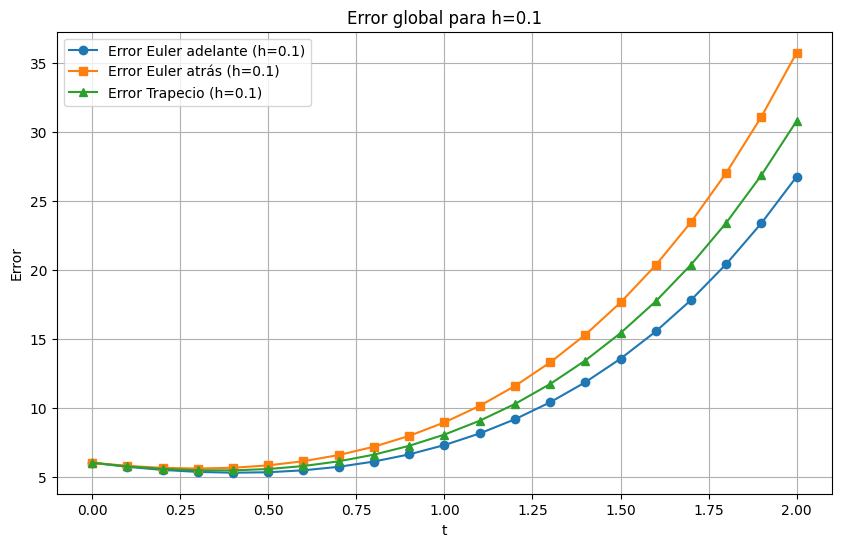

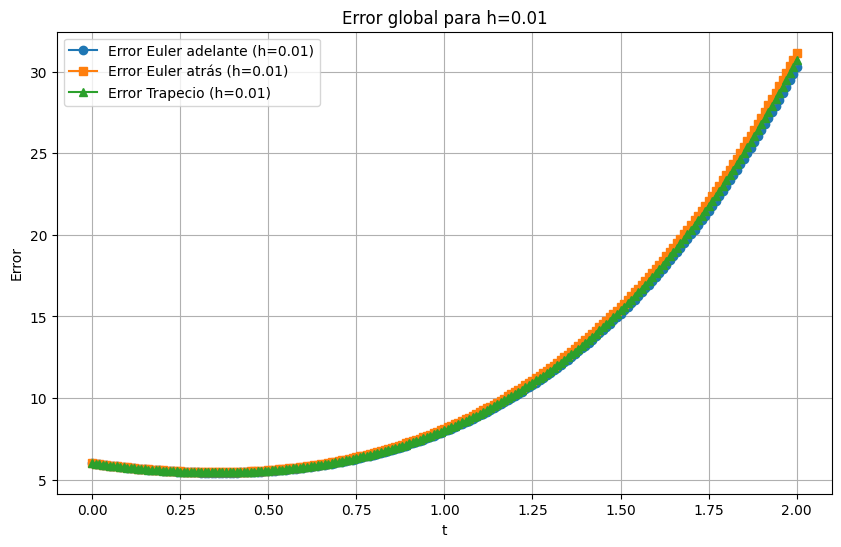

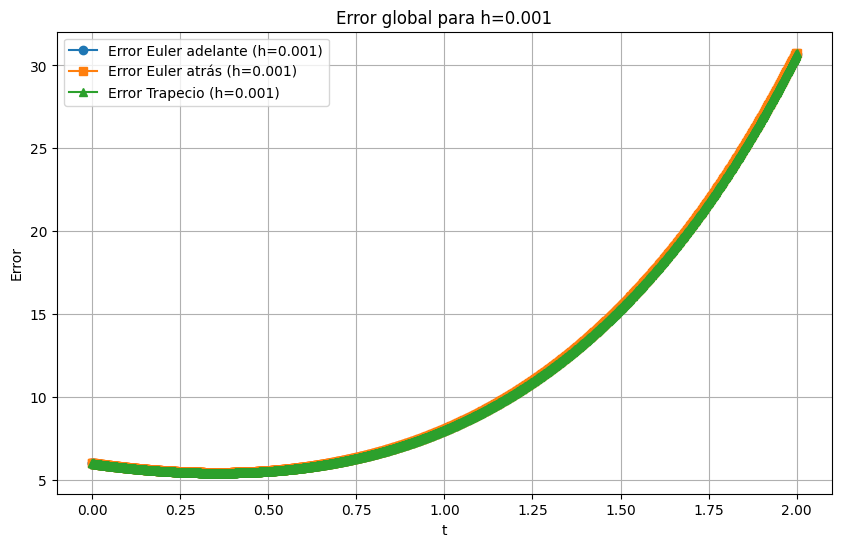

<ipython-input-21-ec5b8ed766c0>:22: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  y_values[n+1] = fsolve(implicit_func, y_values[n])[0]
<ipython-input-21-ec5b8ed766c0>:35: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  y_values[n+1] = fsolve(implicit_func, y_values[n])[0]


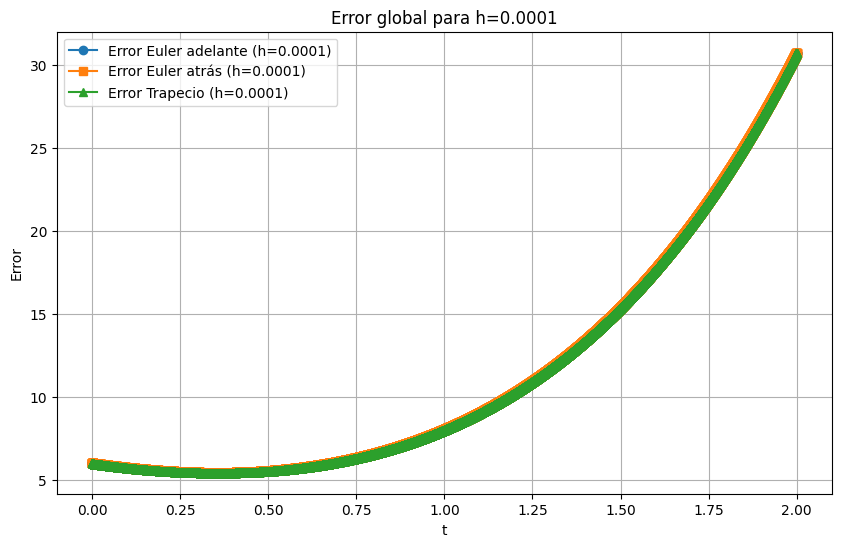

In [ ]:
# Comparación de los errores globales para diferentes métodos
for h in h_values:
    # Solución exacta
    t_exact = np.linspace(t0, tf, 100)
    y_exact = exact_solution(t_exact)

    # Euler hacia adelante
    t_euler_adelante, y_euler_adelante = euler_hacia_adelante(y0, t0, tf, h)
    interp_exact_euler_adelante = interp1d(t_exact, y_exact, kind='cubic')
    y_exact_interp_euler_adelante = interp_exact_euler_adelante(t_euler_adelante)
    error_euler_adelante = np.abs(y_exact_interp_euler_adelante - y_euler_adelante)

    # Euler hacia atrás
    t_euler_atras, y_euler_atras = euler_hacia_atras(y0, t0, tf, h)
    interp_exact_euler_atras = interp1d(t_exact, y_exact, kind='cubic')
    y_exact_interp_euler_atras = interp_exact_euler_atras(t_euler_atras)
    error_euler_atras = np.abs(y_exact_interp_euler_atras - y_euler_atras)

    # Método del trapecio
    t_trapezoidal, y_trapezoidal = metodo_trapezoidal(y0, t0, tf, h)
    interp_exact_trapezoidal = interp1d(t_exact, y_exact, kind='cubic')
    y_exact_interp_trapezoidal = interp_exact_trapezoidal(t_trapezoidal)
    error_trapezoidal = np.abs(y_exact_interp_trapezoidal - y_trapezoidal)

    # Graficar errores globales
    plt.figure(figsize=(10, 6))
    plt.plot(t_euler_adelante, error_euler_adelante, label=f'Error Euler adelante (h={h})', marker='o')
    plt.plot(t_euler_atras, error_euler_atras, label=f'Error Euler atrás (h={h})', marker='s')
    plt.plot(t_trapezoidal, error_trapezoidal, label=f'Error Trapecio (h={h})', marker='^')
    plt.title(f'Error global para h={h}')
    plt.xlabel('t')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.show()

#Explicación de qué pasa al comparar métodos

##Diferencias



*   **Euler hacia adelante:**
Euler es explícito, por lo que es más fácil de implementar. Sin embargo, puede ser inestable para pasos grandes de  h, lo que puede generar un error significativo en la aproximación.
*   **Euler hacia atrás:**
Siendo implícito, este método es más estable que Euler hacia adelante, pero requiere resolver ecuaciones no lineales en cada paso. Por lo tanto, es más costoso computacionalmente, aunque produce mejores aproximaciones.
*   **Trapecio:**
Este método también es implícito y combina lo mejor de ambos mundos: es más preciso que Euler hacia adelante y generalmente más estable que ambos. Además, al ser de orden 2, el error global es menor que el de los métodos de Euler.




##Comparación

* **Precisión:** El método del trapecio es el más preciso en general, seguido de Euler hacia atrás y luego Euler hacia adelante.
* **Estabilidad:** Euler hacia atrás y el método del trapecio son más estables que Euler hacia adelante, especialmente para valores más grandes de  h .
* **Costo computacional:** Euler hacia adelante es el más eficiente, pero a costa de precisión y estabilidad. Los métodos implícitos, aunque más costosos, ofrecen mejores resultados.